In [3]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

https://keras.io/examples/vision/handwriting_recognition/

In [4]:
base_path = "handwrite/iam_words"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if 'err' not in line:
        words_list.append(line)


print(len(words_list))

words_list = words_list[:-1]
print(words_list)
np.random.shuffle(words_list)


38269
['a01-000u-00-00 ok 154 408 768 27 51 AT A\n', 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE\n', 'a01-000u-00-02 ok 154 796 764 70 50 TO to\n', 'a01-000u-00-03 ok 154 919 757 166 78 VB stop\n', 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.\n', 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell\n', 'a01-000u-00-06 ok 154 1896 757 173 72 IN from\n', 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating\n', 'a01-000u-01-01 ok 156 901 958 147 79 DTI any\n', 'a01-000u-01-02 ok 156 1112 958 208 42 AP more\n', 'a01-000u-01-03 ok 156 1400 937 294 59 NN Labour\n', 'a01-000u-01-04 ok 156 1779 932 174 63 NN life\n', 'a01-000u-01-05 ok 156 2008 933 237 70 NNS Peers\n', 'a01-000u-02-00 ok 157 408 1106 65 70 BEZ is\n', 'a01-000u-02-01 ok 157 541 1118 72 54 TO to\n', 'a01-000u-02-02 ok 157 720 1114 113 63 BE be\n', 'a01-000u-02-03 ok 157 916 1136 281 46 VBN made\n', 'a01-000u-02-04 ok 157 1281 1117 80 59 IN at\n', 'a01-000u-02-05 ok 157 1405 1140 64 35 AT a\n', 'a01-000u-02-06 ok 157 1544 111

In [4]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(test_samples)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 34441
Total validation samples: 1913
Total test samples: 1914


In [5]:
for (i, file_line) in enumerate(train_samples):
    
    line_split = file_line.strip()
    print(line_split)

c04-004-05-07 ok 180 1857 1664 109 27 BED were
e01-062-02-04 ok 179 1099 1165 119 28 MD can
a02-032-04-08 ok 189 1576 1399 29 94 ) )
d01-118-05-08 ok 154 1527 1588 134 91 NN text
c06-116-07-01 ok 177 534 1993 267 71 &FW GRIDO
b01-027-03-07 ok 189 1880 1357 7 8 . .
a05-048-09-03 ok 173 1468 2428 72 37 TO to
c02-030-04-03 ok 160 1003 1467 224 75 NNS streets
a01-038-07-07 ok 182 2062 1903 219 62 NP- Che-
d06-020-02-03 ok 150 884 1140 182 85 VB face
d06-041-07-00 ok 164 332 1953 180 100 HV have
a01-007u-02-02 ok 167 1171 1125 146 67 RB still
e04-058-04-08 ok 161 1666 1459 75 67 IN For
a05-099-05-07 ok 183 1649 1651 225 47 VBN linked
a01-026-01-02 ok 182 635 1069 282 63 NP Commons
d06-008-07-01 ok 148 755 2044 65 57 BEZ is
c03-087f-07-04 ok 171 1133 2137 132 67 ATI the
c03-021c-02-03 ok 186 1090 1123 107 133 RB yet
a04-010-02-05 ok 172 1494 1227 8 9 . .
c04-110-01-12 ok 167 1472 986 75 45 NN song
e07-012-06-06 ok 157 1578 1811 181 74 NN hold
d04-131-03-04 ok 165 1249 1259 98 71 ATI the
a03-

In [6]:
base_image_path = os.path.join(base_path, "words")


paths = []
corrected_samples = []
for (i, file_line) in enumerate(words_list):
    
    line_split = file_line.strip()
    line_split = line_split.split(" ")
    image_name = line_split[0]
    
    partI = image_name.split("-")[0]
    partII = image_name.split("-")[1]

    img_path = os.path.join(
        base_image_path, partI, partI + "-" + partII, image_name + ".png"
    )
    if os.path.getsize(img_path):
        paths.append(img_path)
        corrected_samples.append(file_line.split("\n")[0])
        print(file_line.split("\n")[0])
        

    print(img_path)
    
    


c04-004-05-07 ok 180 1857 1664 109 27 BED were
handwrite/iam_words\words\c04\c04-004\c04-004-05-07.png
e01-062-02-04 ok 179 1099 1165 119 28 MD can
handwrite/iam_words\words\e01\e01-062\e01-062-02-04.png
a02-032-04-08 ok 189 1576 1399 29 94 ) )
handwrite/iam_words\words\a02\a02-032\a02-032-04-08.png
d01-118-05-08 ok 154 1527 1588 134 91 NN text
handwrite/iam_words\words\d01\d01-118\d01-118-05-08.png
c06-116-07-01 ok 177 534 1993 267 71 &FW GRIDO
handwrite/iam_words\words\c06\c06-116\c06-116-07-01.png
b01-027-03-07 ok 189 1880 1357 7 8 . .
handwrite/iam_words\words\b01\b01-027\b01-027-03-07.png
a05-048-09-03 ok 173 1468 2428 72 37 TO to
handwrite/iam_words\words\a05\a05-048\a05-048-09-03.png
c02-030-04-03 ok 160 1003 1467 224 75 NNS streets
handwrite/iam_words\words\c02\c02-030\c02-030-04-03.png
a01-038-07-07 ok 182 2062 1903 219 62 NP- Che-
handwrite/iam_words\words\a01\a01-038\a01-038-07-07.png
d06-020-02-03 ok 150 884 1140 182 85 VB face
handwrite/iam_words\words\d06\d06-020\d06-020-

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples

In [8]:
train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [9]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)
        
    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

print(characters)

train_labels_cleaned[0:]

Maximum length:  19
Vocab size:  76
['!', '"', '#', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


['were',
 'can',
 ')',
 'text',
 'GRIDO',
 '.',
 'to',
 'streets',
 'Che-',
 'face',
 'have',
 'still',
 'For',
 'linked',
 'Commons',
 'is',
 'the',
 'yet',
 '.',
 'song',
 'hold',
 'the',
 'now',
 'pinned',
 'the',
 'bases',
 '-',
 ',',
 'America',
 '"',
 '-',
 'the',
 'if',
 'possible',
 ',',
 'in',
 'month',
 ',',
 'end',
 'denied',
 'not',
 'which',
 'customers',
 'arrived',
 'the',
 'hot',
 'sides',
 'of',
 'Charles',
 '.',
 ',',
 'should',
 'literal',
 'regards',
 '.',
 'Adhem',
 'armoured',
 'recruiting',
 'tools',
 'with',
 'is',
 'to',
 '89-year-old',
 "don't",
 'obvious',
 'out',
 'has',
 'this',
 'around',
 'story',
 'people',
 'a',
 '.',
 'since',
 "'ll",
 'those',
 'before',
 'finds',
 'paid',
 'not',
 'be',
 'only',
 'shock',
 'were',
 '1944',
 'the',
 'Rhodesia',
 'on',
 'Government',
 'doubtful',
 'South',
 'destructive',
 'some',
 'before',
 '.',
 'statements',
 'Many',
 'Dr.',
 'will',
 'will',
 ',',
 'an',
 'piece',
 'odd',
 'threat',
 'tarmac',
 'a',
 ',',
 '"',
 '

In [10]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)
test_labels_cleaned

['.',
 'the',
 'footrest',
 'proposals',
 'would',
 'WOODWORKER',
 'Mr.',
 'a',
 'because',
 'not',
 'zestful',
 '.',
 'night',
 'Britain',
 ',',
 'the',
 'heads',
 'papyrus',
 'however',
 'who',
 '1957',
 'its',
 'South',
 'Britain',
 'a',
 'can',
 'coherent',
 'he',
 'the',
 'whole',
 'behind',
 'again',
 'well-known',
 'with',
 'continues',
 'the',
 ',',
 'Mr.',
 'The',
 "Macmillan's",
 '.',
 'knowledge',
 'spite',
 'which',
 'begun',
 'personal',
 'in',
 'pinned',
 'in',
 'to',
 'MR.',
 'months',
 'of',
 'to',
 'had',
 'might',
 'the',
 'big',
 'only',
 'problems',
 'energies',
 'Sir',
 'too',
 'and',
 'a',
 'from',
 'join',
 ',',
 '.',
 'be',
 'asked',
 'on',
 'and',
 'able',
 'that',
 'someone',
 'slide',
 'the',
 'bound',
 'mild',
 'Mr.',
 'many',
 'and',
 'on',
 '.',
 'in',
 'their',
 'tried',
 'conscious',
 '30',
 'at',
 'the',
 'of',
 'the',
 'idea',
 '.',
 '210million',
 'Medical',
 '.',
 'drug',
 'September',
 'payment',
 'former',
 'even',
 'Ban-',
 'way',
 ',',
 'in',
 'o

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [12]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

In [13]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [14]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

In [15]:
train_ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

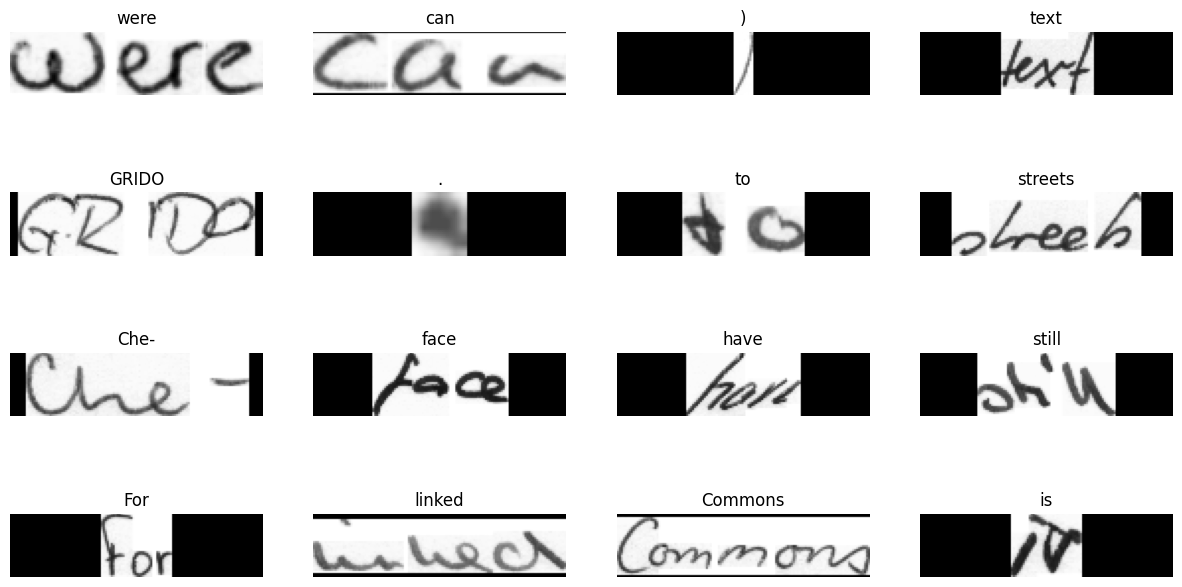

In [16]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

#model craete


In [17]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)            │ (None, 128, 32, 1)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 128, 32, 32)       │             320 │ image[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 64, 16, 32)        │               0 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv2 (Conv2D)                │ (None, 64, 16, 64)        │          18,496 │ pool1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool2 (MaxPooling2D)          │ (None, 32, 8, 64)         │               0 │ Conv2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 32, 512)           │               0 │ pool2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense1 (Dense)                │ (None, 32, 64)            │          32,832 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 32, 64)            │               0 │ dense1[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 32, 256)           │         197,632 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_1               │ (None, 32, 128)           │         164,352 │ bidirectional[0][0]        │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ label (InputLayer)            │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense2 (Dense)                │ (None, 32, 79)            │          10,191 │ bidirectional_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ctc_loss (CTCLayer)           │ (None, 32, 79)            │               0 │ label[0][0], dense2[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 423,823 (1.62 MB)

 Trainable params: 423,823 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [19]:
def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i],labels)
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )




In [21]:
epochs = 1
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)
# Train the model
history = model.fit(
    train_ds,
    validation_data=train_ds,
    epochs=epochs,
    callbacks=[early_stopping],
)

539/539 ━━━━━━━━━━━━━━━━━━━━ 75s 139ms/step - loss: 868.8331 - val_loss: 820.2042


In [29]:
model.get_layer(name="Conv1").input

<KerasTensor shape=(None, 128, 32, 1), dtype=float32, sparse=None, name=image>

In [24]:
prediction_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)            │ (None, 128, 32, 1)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 128, 32, 32)       │             320 │ image[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 64, 16, 32)        │               0 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv2 (Conv2D)                │ (None, 64, 16, 64)        │          18,496 │ pool1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool2 (MaxPooling2D)          │ (None, 32, 8, 64)         │               0 │ Conv2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 32, 512)           │               0 │ pool2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense1 (Dense)                │ (None, 32, 64)            │          32,832 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 32, 64)            │               0 │ dense1[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 32, 256)           │         197,632 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_1               │ (None, 32, 128)           │         164,352 │ bidirectional[0][0]        │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ label (InputLayer)            │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense2 (Dense)                │ (None, 32, 79)            │          10,191 │ bidirectional_1[0][0]      │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 423,823 (1.62 MB)

 Trainable params: 423,823 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        print(res)
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in test_ds.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

ValueError: Layer 'functional_2' expected 2 input(s). Received 1 instead.